<a href="https://www.kaggle.com/code/aleksandrmorozov123/time-series-forecasting?scriptVersionId=158345180" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce-data/data.csv


**Generating synthetic white noise**

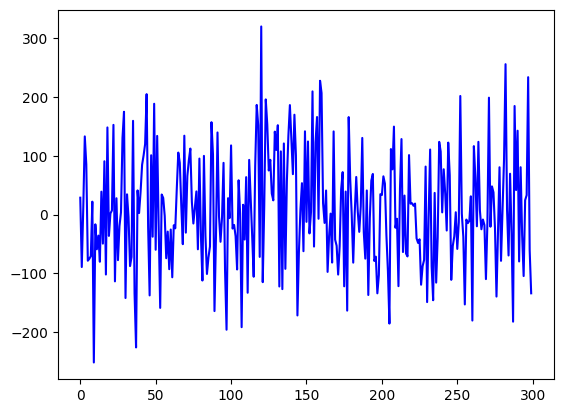

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

time = np.arange (300)
values = np.random.randn (300) * 100

fig, ax = plt.subplots()

ax.plot(time, values, color="blue")

**Red noise** - $ x_{j+1} = r \cdot x_j + (1 - r^2)^{\frac{1}{2}} \cdot w$

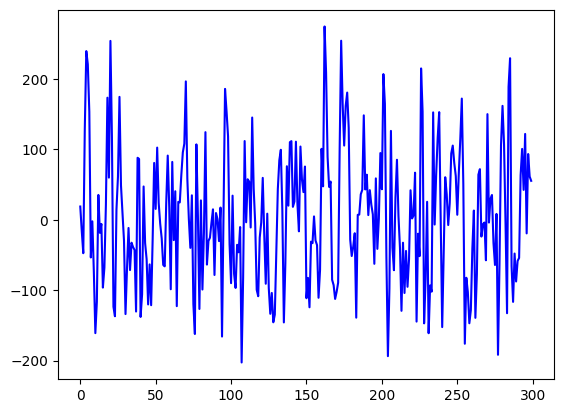

In [3]:
r = 0.4
time = np.arange (300)
white_noise = np.random.randn (300) * 100
values = np.zeros (300)

for i, v in enumerate (white_noise):
    if i == 0:
        values [i] = v
    else:
        values [i] = r*values [i-1] + np.sqrt ((1-np.power (r, 2))) * v

fig, ax = plt.subplots()

ax.plot(time, values, color="blue")

**Create synthetical cyclical time series**

  Cloning https://github.com/TimeSynth/TimeSynth.git to /tmp/pip-req-build-jijdlv1x
  Running command git clone --filter=blob:none --quiet https://github.com/TimeSynth/TimeSynth.git /tmp/pip-req-build-jijdlv1x
  Resolved https://github.com/TimeSynth/TimeSynth.git to commit e50cdb9015d415adf46a4eae161a087c5c378564
  Preparing metadata (setup.py) ... - done
  Obtaining dependency information for symengine>=0.4 from https://files.pythonhosted.org/packages/a6/69/97a99ae1835810e0f3f4f471cdfcb6d886be93e4ee5688397deacab955bc/symengine-0.11.0-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.2/136.2 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ | done
  Preparing metadata (setup.py) ... - \ | done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 21.4 MB/s eta 0:00:00
  Created wheel for timesynth: filename=timesynth-0.2.4-py3-none-any.whl size=15422 sha256=44d346da9ef270c5e1c1c924800690ff

Text(0.5, 1.0, 'Irregularly sampled sinusoid with noise')

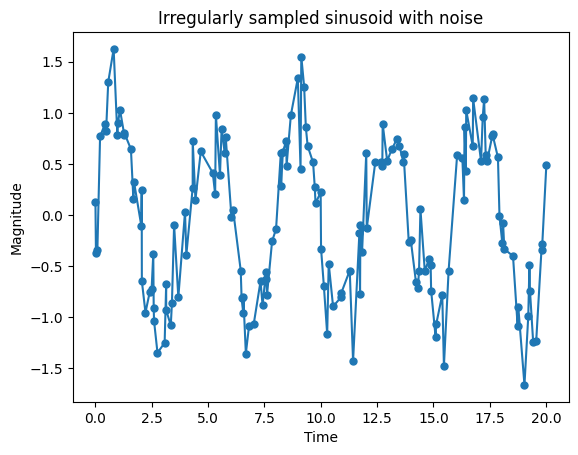

In [4]:
# cite from -  J. R. Maat, A. Malali, and P. Protopapas, 
#“TimeSynth: A Multipurpose Library for Synthetic Time Series in Python,” 2017. 
#[Online]. Available: http://github.com/TimeSynth/TimeSynth
!pip uninstall timesynth --yes
!pip install git+https://github.com/TimeSynth/TimeSynth.git
import timesynth as ts

time_sampler = ts.TimeSampler (stop_time = 20)
irregular_time_samples = time_sampler.sample_irregular_time (num_points = 300,
                                                            keep_percentage = 50)
sinusoid = ts.signals.Sinusoidal (frequency = 0.25)
white_noise = ts.noise.GaussianNoise (std = 0.3)
timeseries = ts.TimeSeries (sinusoid, noise_generator = white_noise)
samples, signals, errors = timeseries.sample (irregular_time_samples)

plt.plot (irregular_time_samples, samples, marker = "o", markersize = 5)
plt.xlabel ("Time")
plt.ylabel ("Magnitude")
plt.title ("Irregularly sampled sinusoid with noise")

**Preparing a real dataset**

In [5]:
df = pd.read_csv ('/kaggle/input/ecommerce-data/data.csv', encoding='ISO-8859-1')
df ['InvoiceDate'] = pd.to_datetime (df ['InvoiceDate'], yearfirst = True)
df.InvoiceDate.min (), df.InvoiceDate.max ()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

In [6]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df.isnull().sum().sum()

136534

In [8]:
df.isnull ().values.any ()

True

In [9]:
df.describe (include = 'all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,NaN,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,NaN,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570,NaN
min,NaN,NaN,NaN,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,NaN


In [10]:
df.replace (0, np.NaN, inplace = True)
df.isnull ().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice        2515
CustomerID     135080
Country             0
dtype: int64